# **Projektarbeit: Diabetes**

**Kurs:** Maschinelles Lernen (MaLe-AD23-HS24)  
**Autor/in:** Christoph Reichlin <br>
**Datum:** 18.12.2024

- [Website des Datensatzes](https://www.kaggle.com/datasets/vikasukani/diabetes-data-set/data)


---







## **Einführung**


## Problemstellung
Ziel ist es, mithilfe von medizinischen Daten vorherzusagen, ob ein Patient an Diabetes erkrankt ist oder nicht. Diese binäre Klassifikation soll mit Supervised Learning gelöst werden.

## Daten
Der Datensatz umfasst:
- **Zeilen:** 2000
- **Spalten:** 9 (davon 1 Zielvariable)

## Zielvariable
Die Zielvariable ist `Outcome`. 

## Features und Bedeutung

1. **Pregnancies**
   - Anzahl der Schwangerschaften, die eine Person hatte.

2. **Glucose**
   - Messung des Blutzuckerspiegel (in mg/dl) nach einer Glukosebelastung.

3. **Blood Pressure**
   - Blutdruck (in mmHg) diastolisch gemessen .

4. **Skin Thickness**
   - Hautfaltendicke (in mm), gemessen an der Trizeps-Stelle.

5. **Insulin**
   - Serum-Insulinspiegel (in μU/ml).

6. **BMI**
   - Body Mass Index ( in kg/m²).

7. **Diabetes Pedigree Function**
   - Ein berechneter Wert, der die genetische Wahrscheinlichkeit von Diabetes anhand der Familienanamnese beschreibt.

8. **Age**
   - Alter der Person (in Jahren).

9. **Zielvariable**
- `0 = Nein`: Kein Diabetes
- `1 = Ja`: Diabetes vorhanden

10. **Insulin Missing**
   - `1 = Insulin Messwert nicht vorhanden`
   - `0 = Insulin Messwert vorhanden`


---
## **Ressourcen & Einflüsse**

- [A model for early prediction of diabetes](https://www.sciencedirect.com/science/article/pii/S2352914819300176)
- [An Enhanced Machine Learning Framework for Type 2 Diabetes Classification Using Imbalanced Data with Missing Values](https://onlinelibrary.wiley.com/doi/10.1155/2021/9953314?msockid=0be8035a829d69f42fe6161d83e96824)
- [Chatgpt](https://openai.com/chatgpt/overview/)


---


## **Setup**

<span style="color:#2D8FF3;font-style:italic">
<b>Anleitung:</b>
In diesem Abschnitt geht es darum, das Jupyter Notebook zu 
konfigurieren.
</span>


Our color palette:


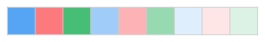

In [14]:
# Basic imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


# Enable vectorized graphics
%config InlineBackend.figure_formats = ["svg"]

# Setup plotting
PALETTE = [ (0.341, 0.648, 0.962, 1.0), 
            (0.990, 0.476, 0.494, 1.0), 
            (0.281, 0.749, 0.463, 1.0), 
            (0.629, 0.802, 0.978, 1.0), 
            (0.994, 0.705, 0.715, 1.0), 
            (0.595, 0.858, 0.698, 1.0), 
            (0.876, 0.934, 0.992, 1.0), 
            (0.998, 0.901, 0.905, 1.0), 
            (0.865, 0.952, 0.899, 1.0) ]

# For more color palettes, see here:
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
#PALETTE = sns.color_palette("husl", 8)
#PALETTE = sns.color_palette("viridis", 10)

print("Our color palette:")
sns.palplot(PALETTE, size=0.5)

sns.set_style("whitegrid")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETTE)
plt.rcParams["figure.dpi"] = 300    # High-res figures (DPI)
plt.rcParams["pdf.fonttype"] = 42   # Editable text in PDF

---
## **Präprozessierung**

<span style="color:#2D8FF3;font-style:italic">
<b>Anleitung:</b>
In diesem Abschnitt werden die Daten geladen und aufbereitet.<br>
</span>


In [15]:
# Code to load and preprocess the data
diabetes = pd.read_csv("diabetes-dataset.csv")

In [16]:
#show the first 10 rows of the dataset
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


---

## **Explorative Datenanalyse**

<span style="color:#2D8FF3;font-style:italic">
<b>Anleitung:</b>
Hier untersucht ihr eure Daten ein erstes Mal, visualisiert sie und versucht, Muster zu erkennen.
Zeigt hier, dass ihr neugierig seid und euch mit den Daten auseinandersetzt.
</span>



In [17]:
# describe the dataset
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [18]:
#info about the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [19]:
# Count duplicates in the dataset
duplicate_count = diabetes.duplicated().sum()

# Print the number of duplicates
print(f"Anzahl der doppelten Zeilen im Datensatz: {duplicate_count}")


Anzahl der doppelten Zeilen im Datensatz: 1256


In [20]:
# Proportion of missing values in the dataset
row_counts = diabetes.value_counts()
print(row_counts[row_counts > 1])  # Show rows with more than one occurrence



Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
2            81       72             15             76       30.1  0.547                     25   0          6
             83       65             28             66       36.8  0.629                     24   0          5
6            154      74             32             193      29.3  0.839                     39   0          5
3            80       0              0              0        0.0   0.174                     22   0          5
4            125      70             18             122      28.9  1.144                     45   1          5
                                                                                                            ..
5            96       74             18             67       33.6  0.997                     43   0          2
             95       72             33             0        37.7  0.370                     27   0          2
1     

In [21]:
# Remove duplicates from the dataset
diabetes_cleaned = diabetes.drop_duplicates()

# Count the number of rows after removing duplicates
print(f"Anzahl der Zeilen nach dem Entfernen der Duplikate: {diabetes_cleaned.shape[0]}")


Anzahl der Zeilen nach dem Entfernen der Duplikate: 744


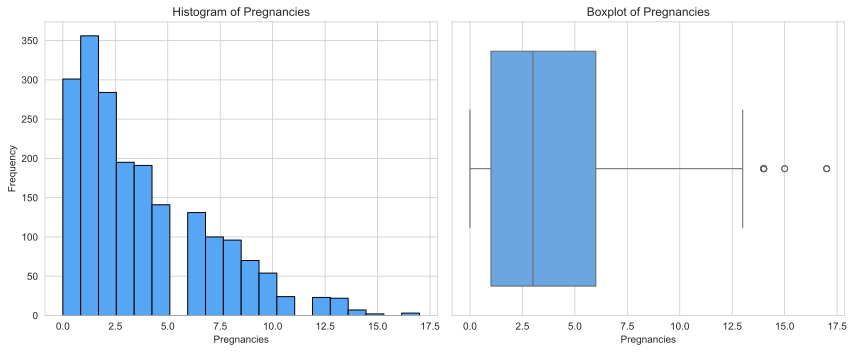

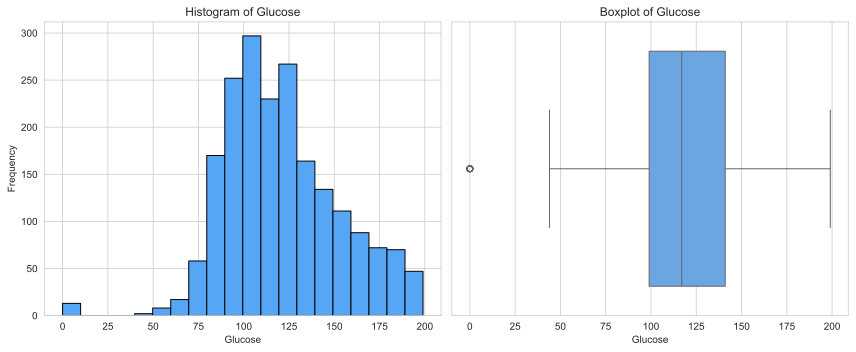

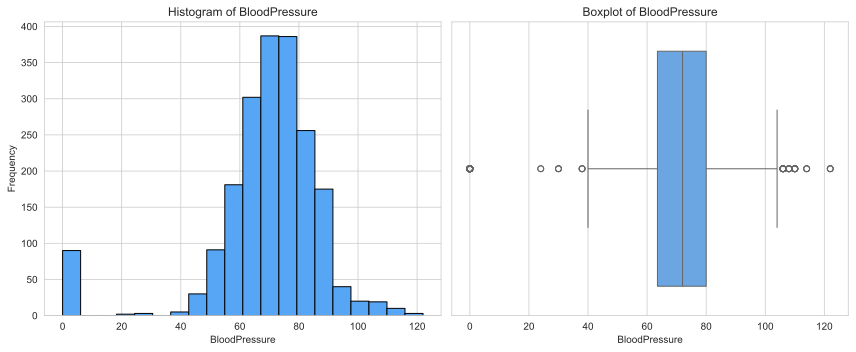

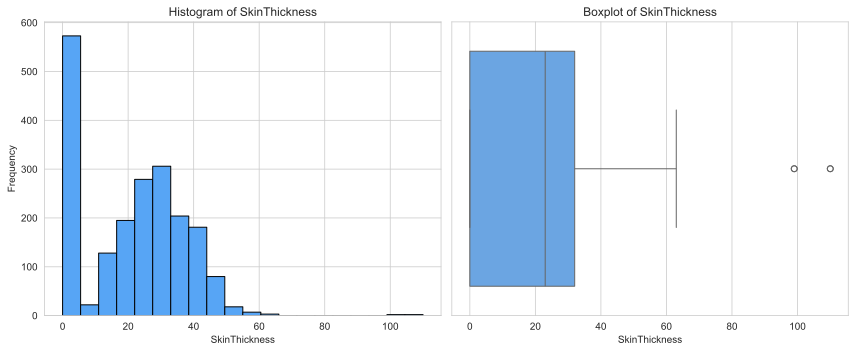

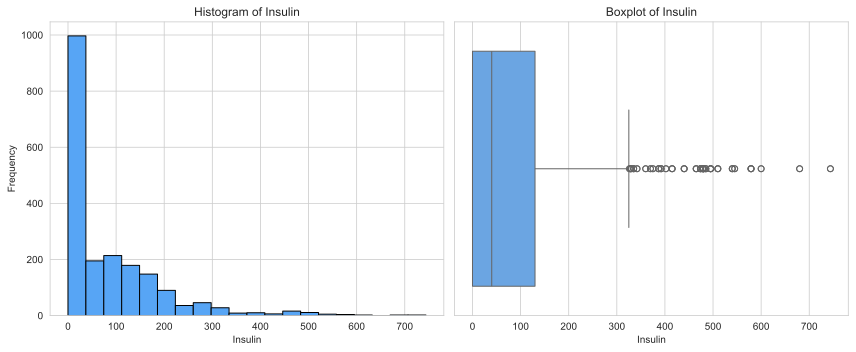

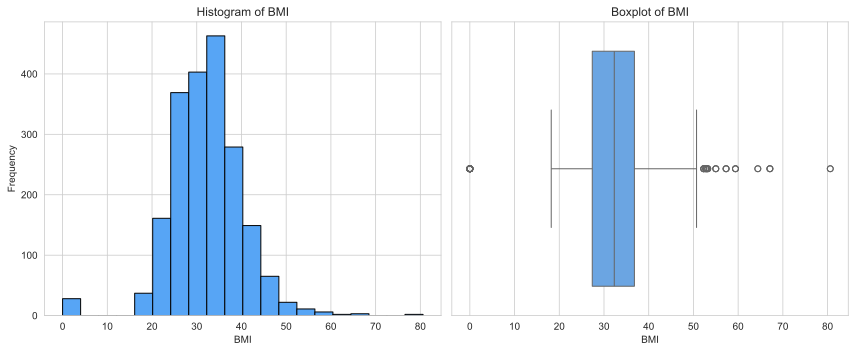

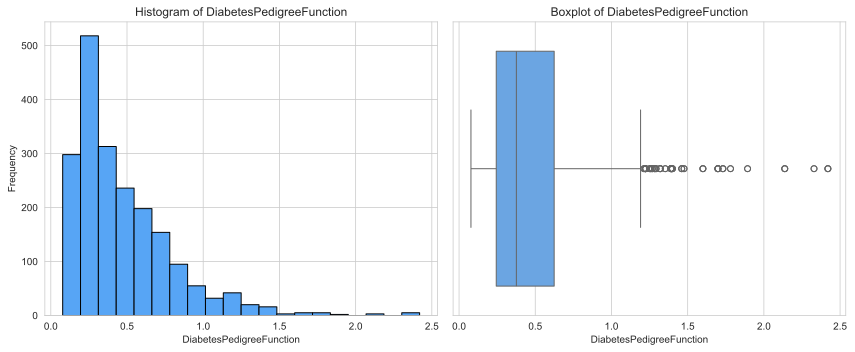

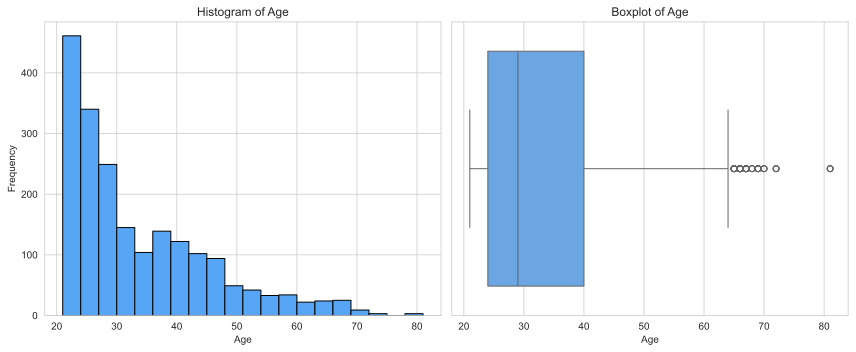

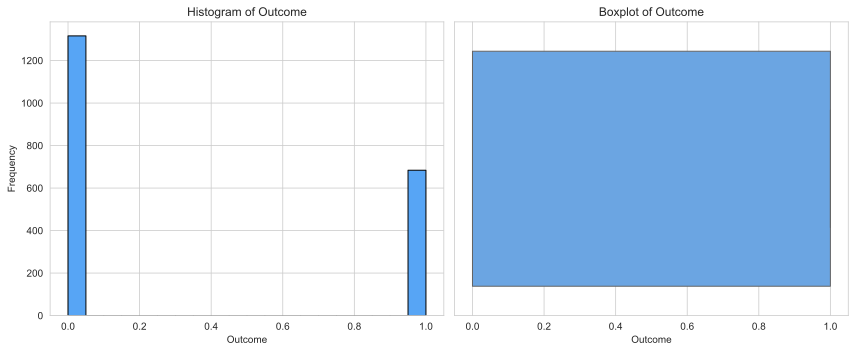

In [22]:


# Loop through all numerical columns in the dataset
for column in diabetes_cleaned.select_dtypes(include='number').columns:
    plt.figure(figsize=(12, 5))  # Set figure size
    
    # Create a histogram for the column
    plt.subplot(1, 2, 1)  # First subplot
    diabetes[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Create a boxplot for the column
    plt.subplot(1, 2, 2)  # Second subplot
    sns.boxplot(x=diabetes[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


<Axes: >

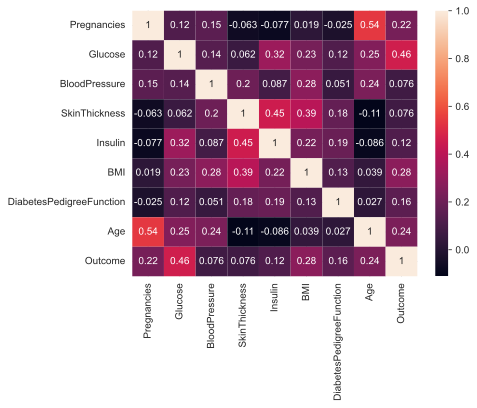

In [23]:
#corr() function to find the pairwise correlation of all columns in the dataframe
diabetes_cleaned.corr()
#heatmap to visualize the correlation
sns.heatmap(diabetes.corr(), annot=True)


In [24]:
# Count how often 0 appears in each column
zero_counts = (diabetes_cleaned == 0).sum()

# Print the counts of 0 values for each column
print("Count of 0 values in each column:")
print(zero_counts)

Count of 0 values in each column:
Pregnancies                 112
Glucose                       5
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                     491
dtype: int64


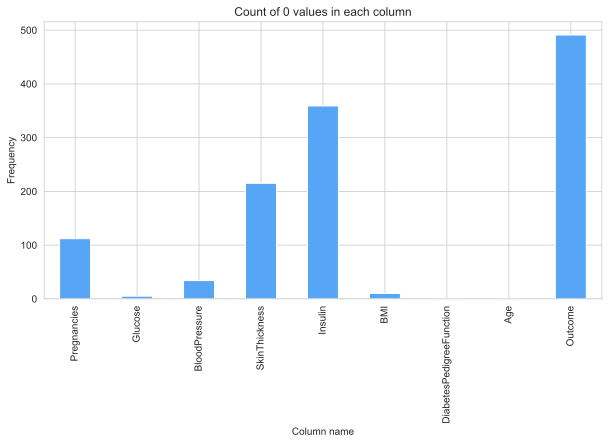

In [25]:
#visualize zero counts
plt.figure(figsize=(10, 5))
zero_counts.plot(kind='bar')
plt.title("Count of 0 values in each column")
plt.ylabel("Frequency")
plt.xlabel("Column name")
plt.show()


---

## **Feature Engineering und Dimensionalitätsreduktion**

<span style="color:#2D8FF3;font-style:italic">
<b>Anleitung:</b>
Beim Feature Engineering versucht ihr aus den verfügbaren Daten nützliche 
neue Features zu generieren. Falls ihr bereits viele Prädiktoren habt, versucht 
ihr die Dimensionalität des Problems mittels eines geeigneten Verfahrens zu reduzieren.
Je nach Datensatz und Problem fällt dieser Abschnitt länger oder kürzer aus.
</span>



In [26]:
#copy the dataset
diabetes_new = diabetes_cleaned.copy()

In [27]:
# new column to indicate missing values for Insulin
diabetes_new['Insulin_Missing'] = (diabetes_new['Insulin'] == 0).astype(int)

# Count the number of 1s and 0s in the new column
diabetes_new['Insulin_Missing'].value_counts()

Insulin_Missing
0    385
1    359
Name: count, dtype: int64

In [28]:

# impute missing values with the median
imputer = SimpleImputer(missing_values=0, strategy='median')
columns_to_impute = ['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

# only impute the columns with missing values
diabetes_new[columns_to_impute] = imputer.fit_transform(diabetes_new[columns_to_impute])

# insure that the new column is of integer type
diabetes_new['Insulin_Missing'] = diabetes_new['Insulin_Missing'].astype(int)

# head of data column
diabetes_new.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Missing
0,2,138.0,62.0,35.0,126.0,33.6,0.127,47,1,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0,0
2,0,145.0,72.0,29.0,126.0,44.2,0.630,31,1,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1,0
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0,0


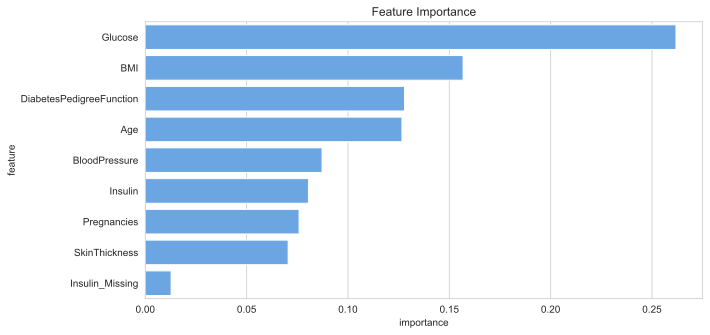

In [29]:

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Split the data into features and target
X = diabetes_new.drop(columns=['Outcome'])
y = diabetes_new['Outcome']

# Fit the classifier
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort values by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)


# Plot a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()


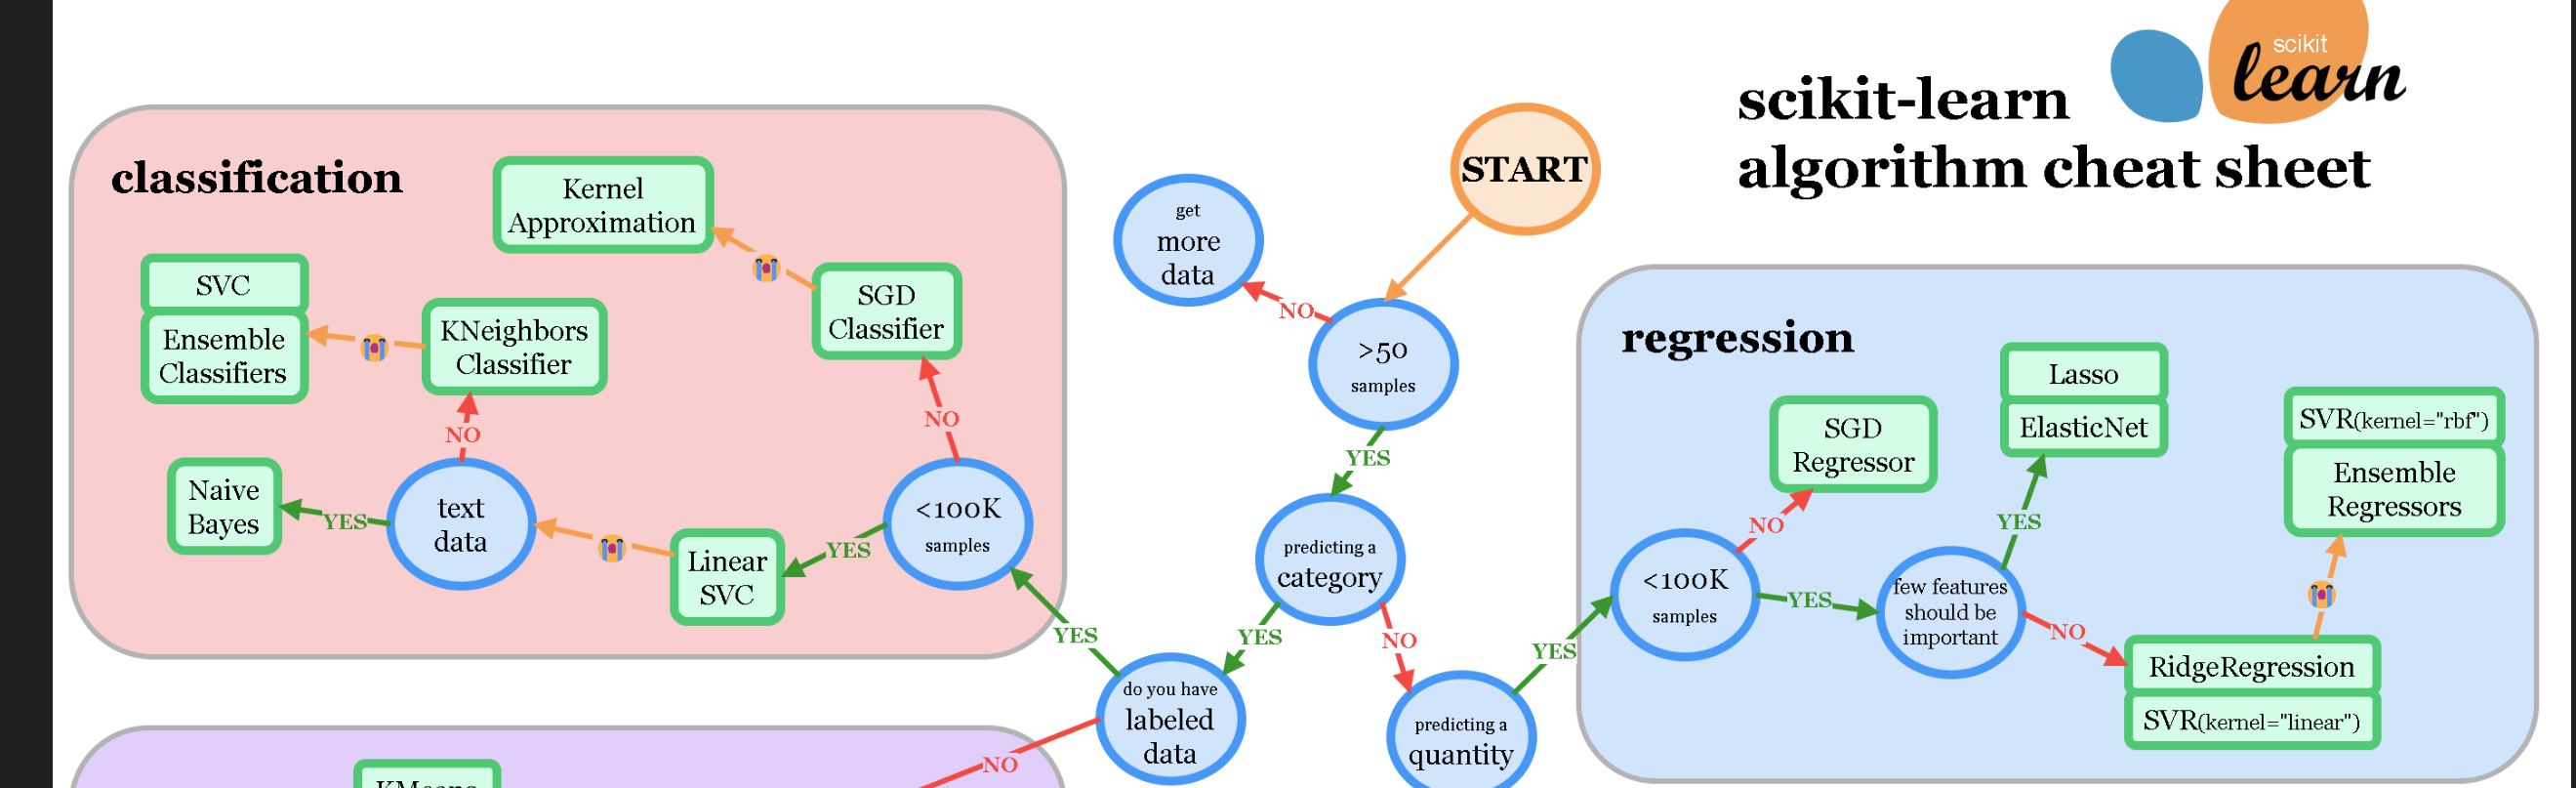

---

## **Modellieren, Trainieren und Validieren**

<span style="color:#2D8FF3;font-style:italic">
<b>Anleitung:</b>
Es folgt der für diese Projektarbeit zentrale Abschnitt. Hier trainiert 
Datenmodelle, und validiert diese. Folgende Punkte sind zu beachten:

<ul>
    <li>Es sollen mindestens <u>zwei verschiedene Datenmodelle</u> trainiert und verglichen werden.</li>
    <li>Die Hyperparameter sollen mittels <u>Kreuzvalidierung</u> ermittelt werden.</li>
    <li>Die Vorhersagegenauigkeit der Modelle müssen mit einem <u>separaten Testdatensatz</u> abgeschätzt werden.</li>
    <li>Die Resultate der Trainings- und Testphasen sollen <u>visualisiert</u> werden (z.B. mittels ROC-Kurve oder Residuen-Plots).</li>
    <li>Bonuspunkte gibt es, falls
        <ul style="list-style-type:  circle;">
            <li>der Generalisierungsfehler des Modells robust ermittelt wird (durch wiederholtes Validieren, so dass die Kennzahlen für Vorhersagegenauigkeit als "µ ± σ" angeben werden kann).</li>
            <li>die Vorhersagefehler der Modelle auf Muster untersucht werden.</li>
            <li>falls eine Standardmodellierung basierend auf Beobachtungen verfeinert und weiterentwickelt wird.</li>
        </ul></li>
</ul>

Wir empfehlen, die verschiedenen Modelle in scikit-learn <a href=https://scikit-learn.org/1.5/modules/compose.html>als Pipelines</a> aufzubauen.
</span>


In [13]:
# Code to perform the model training and validation
...

---

## **Diskussion und Fazit**

<span style="color:#2D8FF3;font-style:italic">
<b>Anleitung:</b>
Diskutiert hier <u>kurz</u> eure Erkenntnisse aus eurer Projektarbeit. Folgende Punkte müsst ihr addressieren:

<ul>
    <li>Wie interpretiert eure Ergebnisse:
        <ul style="list-style-type:  circle;">
            <li>Welches Datenmodell funktioniert am besten?</li>
            <li>Wie gut löst es das formulierte Problem?</li>
            <li>Entsprechen die Ergebnisse euren Erwartungen?</li>
        </ul></li>
    <li>Habt ihr Verbesserungsvorschläge für eure Datenmodelle?</li>
    <li>Beschreibt eure Lernerlebnisse. Was waren eure wichtigsten Erkenntnisse im Verlauf dieses Projekts?</li>
</ul>
</span>

